In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from copulas.multivariate import VineCopula
from copulas.multivariate import GaussianMultivariate
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank

In [2]:
path = "../Data/"

In [3]:
data = pd.read_csv(path+'final.csv')
data = data.drop("Unnamed: 0",axis=1)
data.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,...,orient,target,acc_std,linear_acc_std,rotation_std,mag_field_std,gyr_std,uncalib_gyr_std,orient_std,target_name
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,...,289.098009,0,1.276535,0.674885,0.005473,0.481351,0.155454,0.068428,0.161450,Bus
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,...,166.814524,0,1.283430,0.360393,0.001145,0.966127,0.163807,0.183973,2.673915,Bus
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,...,292.815815,0,0.293053,0.024615,0.009292,0.692043,0.003208,0.024883,0.230437,Bus
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,...,338.585784,0,1.487307,0.919317,0.012744,1.061100,0.159019,0.159166,56.719639,Bus
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,...,361.257574,0,0.607600,0.448189,0.015373,1.178017,0.056566,0.089277,0.273831,Bus


In [4]:
len(data)

5893

In [5]:
label = data['target']
print(label)

0       0
1       0
2       0
3       0
4       0
       ..
5888    4
5889    4
5890    4
5891    4
5892    4
Name: target, Length: 5893, dtype: int64


In [6]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Fusing : Accelerometer, Linear_Accelerometer - mea


In [7]:
acc = pd.DataFrame({'acc':data['acc'],'linear_acc':data['linear_acc']})
acc.head()

,acc,linear_acc
0,9.707576,0.395114
1,9.585344,0.955568
2,9.854207,0.221997
3,9.770933,1.341121
4,9.874786,0.614802


In [8]:
acc_norm = pd.DataFrame({'acc':NormalizeData(data['acc']),'linear_acc':NormalizeData(data['linear_acc'])})

In [9]:
acc_norm.head()

,acc,linear_acc
0,0.232496,0.017061
1,0.220344,0.041313
2,0.247074,0.009570
3,0.238795,0.057996
4,0.249120,0.026568


In [10]:
X = acc_norm.to_numpy()

In [11]:
len(X)

5893

In [12]:
type(X)

numpy.ndarray

In [13]:
X

array([[0.23249575, 0.0170614 ],
       [0.22034351, 0.04131296],
       [0.24707385, 0.00957041],
       ...,
       [0.60746195, 0.41493919],
       [0.46760257, 0.26191964],
       [0.36605997, 0.14726389]])

In [14]:
X.shape

(5893, 2)

### AIC

In [16]:
def AIC(y, y_pred, k):
    mse = mean_squared_error(y, y_pred)
    aic = len(y) * log(mse) + 2 * k
    return aic

### Frank

In [15]:
frank = Frank()
frank.fit(X)
frank_fused = frank.probability_density(X)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


In [17]:
print(frank_fused)

[1.32097992 1.32758372 1.2997431  ... 1.00286665 1.03254723 1.11181853]


In [19]:
frank_res = pd.DataFrame({'fused_acc':frank_fused,'target':data['target']})

<IPython.core.display.Javascript object>


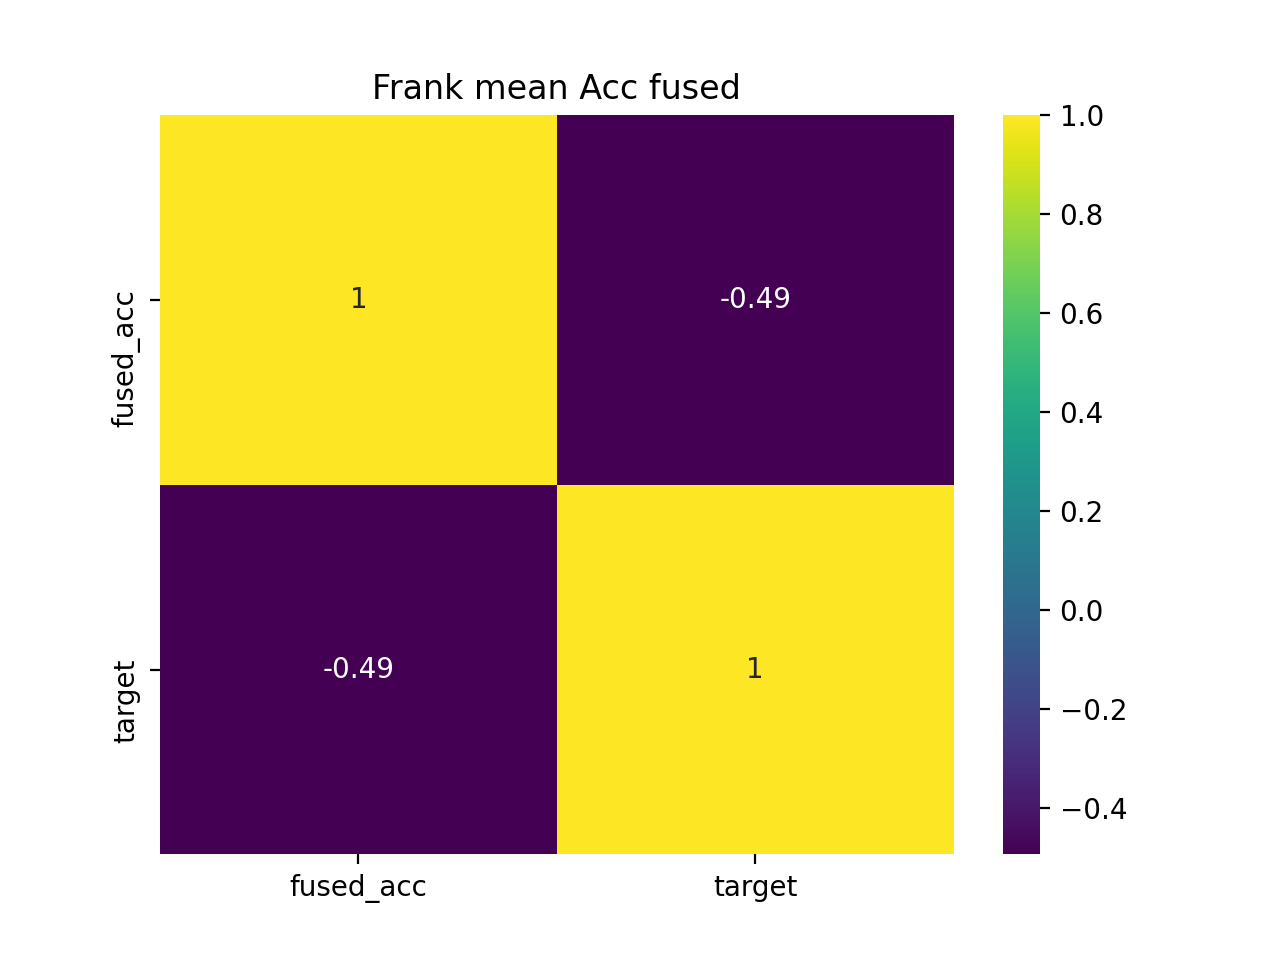

In [25]:
sns.heatmap(frank_res.corr(),annot=True,cmap='viridis')
plt.title("Frank mean Acc fused")
plt.show()

In [20]:
frank_res.to_csv('../Data/acc_frank.csv')

### Clayton

In [22]:
clayton = Clayton()
clayton.fit(X)
fused = clayton.probability_density(X)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/clayton.py:53: RuntimeWarning: divide by zero encountered in power
  a = (self.theta + 1) * np.power(np.multiply(U, V), -(self.theta + 1))
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/clayton.py:54: RuntimeWarning: divide by zero encountered in power
  b = np.power(U, -self.theta) + np.power(V, -self.theta) - 1
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/clayton.py:56: RuntimeWarning: invalid value encountered in multiply
  return a * np.power(b, c)


In [23]:
print(fused)

[1.13349721 1.25088266 0.99953526 ... 1.02801687 1.00893062 1.03761385]


In [24]:
clayton_res = pd.DataFrame({'fused_acc':fused,'target':data['target']})

<IPython.core.display.Javascript object>


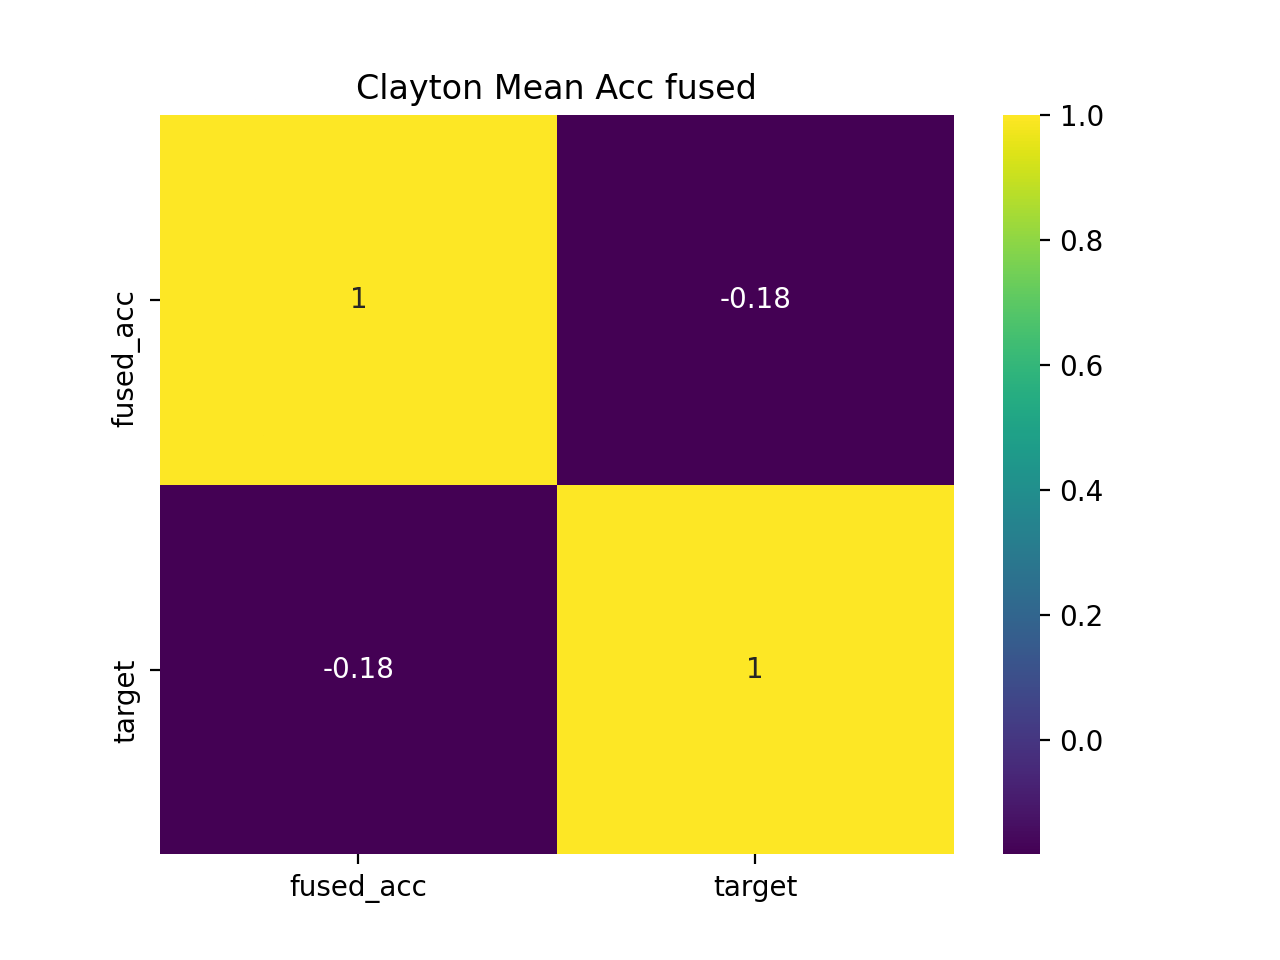

In [26]:
sns.heatmap(clayton_res.corr(),annot=True,cmap='viridis')
plt.title("Clayton Mean Acc fused")
plt.show()

### Gumbel

In [27]:
gumbel = Gumbel()
gumbel.fit(X)
fused = gumbel.probability_density(X)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/gumbel.py:49: RuntimeWarning: divide by zero encountered in power
  a = np.power(np.multiply(U, V), -1)
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/gumbel.py:50: RuntimeWarning: divide by zero encountered in log
  tmp = np.power(-np.log(U), self.theta) + np.power(-np.log(V), self.theta)
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/gumbel.py:52: RuntimeWarning: divide by zero encountered in log
  c = np.power(np.multiply(np.log(U), np.log(V)), self.theta - 1)
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/gumbel.py:79: RuntimeWarning: divide by zero encountered in log
  h = np.power(-np.log(U), self.theta) + np.power(-np.log(V), self.theta)
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/gumbel.py:54: RuntimeWarning: invalid value encountered in multiply
  return self.cumulative_distribution(X) * a * b * c * d


In [28]:
print(fused)

[1.24026686 1.24060642 1.22479154 ... 1.03468916 1.0589675  1.10362674]


In [29]:
gumbel_res = pd.DataFrame({'fused_acc':fused,'target':data['target']})

<IPython.core.display.Javascript object>


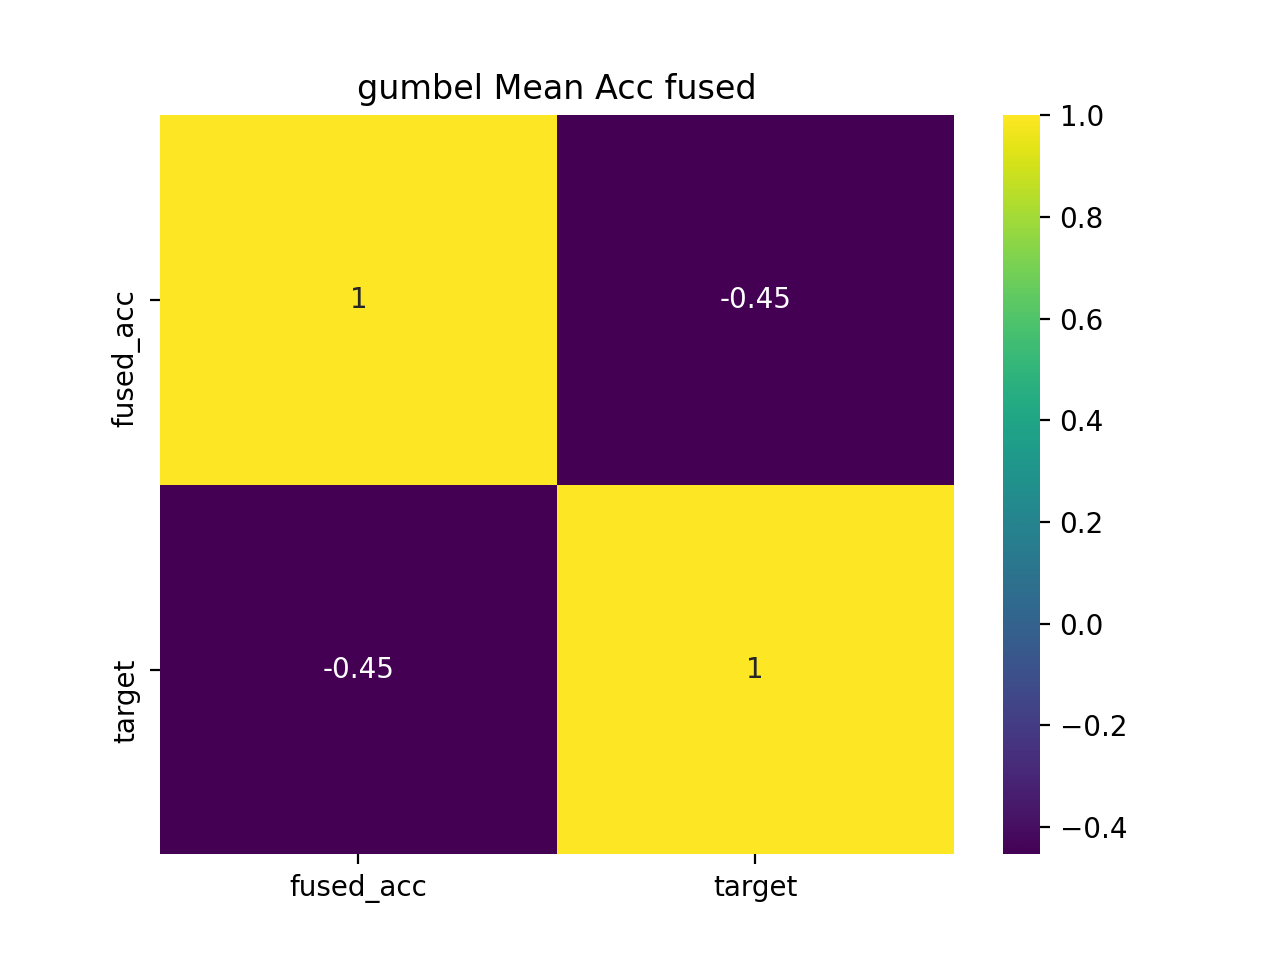

In [30]:
sns.heatmap(gumbel_res.corr(),annot=True,cmap='viridis')
plt.title("gumbel Mean Acc fused")
plt.show()